路徑的設置

In [18]:
img_dir="/Users/liang/Documents/統計數學與運算/images/"
# plt.savefig(img_dir+'.esp',format='eps')
123

In [62]:
import matplotlib.pyplot as plt
# x=[1,2,3]
# y=[4,5,6]
# plt.savefig(img_dir+'practice.eps',format='eps')
# plt.plot(x,y)  

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


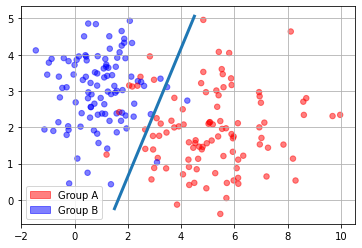

In [66]:
import numpy as np
import scipy.linalg as LA
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
# 1. load data
data_dir = '/Users/liang/Downloads/ml_data/'
D = np.loadtxt(data_dir + 'la_1.txt', comments='%')#讓第一列不要讀進去
# 2. Scatter plot
# −−− define attributes for the scatter plot
s = 30 # define the size of markers
# define the colors of markers according to group value 0, 1 # colors = D[:,2]
# colors = ['red' if i == 0 else 'blue' for i in D[:,2]] 
colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]#把colors做成一個list，[1,0,0]分別代表r,g,b
plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, \
        marker = 'o', alpha = 0.5)
pop_a=mpatches.Patch(color=[1,0,0],alpha=0.5,label='Group A')
pop_b=mpatches.Patch(color=[0,0,1],alpha=0.5,label='Group B')
plt.legend(handles=[pop_a,pop_b])
plt.grid(True)
plt.savefig(img_dir+'la3.eps', format='eps')

#--------------------------------------------------------------
# 3. Estimate the coefficients
n = len(D[:, 0])
X = np.hstack((np.ones((n, 1)), D[:, 0:2]))
# X = np.c((np.ones(n), D[:, 0:2]))#np.c會自己幫你決定np.ones的size
y = D[:, 2]#第二行
b = LA.inv(X.T @ X) @ X.T @ y.T
# Draw a linear regression line
x = np.array([1.5, 4.5])
y_hat = -(b[0] - 0.5 + b[1] * x) / b[2]
plt.plot(x, y_hat, lw=3)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


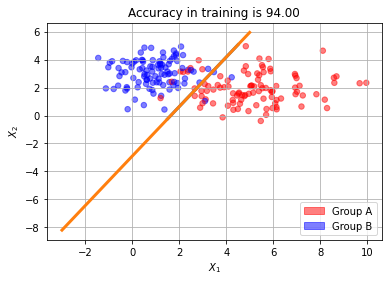

In [70]:
import numpy as np
import scipy.linalg as LA
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
# 1. load data
data_dir = '/Users/liang/Downloads/ml_data/'
D = np.loadtxt(data_dir + 'la_1.txt', comments='%')#讓第一列不要讀進去
# 2. Scatter plot
# −−− define attributes for the scatter plot
s = 30 # define the size of markers
# define the colors of markers according to group value 0, 1 # colors = D[:,2]
# colors = ['red' if i == 0 else 'blue' for i in D[:,2]] 
colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]#把colors做成一個list，[1,0,0]分別代表r,g,b
plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, \
        marker = 'o', alpha = 0.5)
pop_a=mpatches.Patch(color=[1,0,0],alpha=0.5,label='Group A')
pop_b=mpatches.Patch(color=[0,0,1],alpha=0.5,label='Group B')
plt.legend(handles=[pop_a,pop_b])
plt.grid(True)
plt.savefig(img_dir+'la3.eps', format='eps')

#--------------------------------------------------------------
# 3. Estimate the coefficients
n = len(D[:, 0])
X = np.hstack((np.ones((n, 1)), D[:, 0:2]))
# X = np.c((np.ones(n), D[:, 0:2]))#np.c會自己幫你決定np.ones的size
y = D[:, 2]#第二行
b = LA.inv(X.T @ X) @ X.T @ y.T
# Draw a linear regression line
x = np.array([1.5, 4.5])
y_hat = -(b[0] - 0.5 + b[1] * x) / b[2]
plt.plot(x, y_hat, lw=3)
# plt.show()

#------------------------------------------------------
from sklearn.linear_model import LinearRegression
# Linear Regression by sklearn
Mdl = LinearRegression()# 建 立 新 的 linear regression model Mdl.fit(X, y) # 進行估計 ( 配適 )
X= D[:, 0:2]
y=D[:,3]
Mdl.fit(X,y)
# R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估 計 結 果 :beta0
coeffs = Mdl.coef_ # # 估 計 結 果 :beta1, beta2, ...
# Draw a regression line
x = np.array([-3, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
plt.plot(x, f, lw=3)
# Calculate testing error
y_hat = Mdl.predict(X) # 預測或計算擬合值 
y_pre=[1 if i>0.5 else 0 for i in y_hat] # 群組判讀
plt.title('Accuracy in training is {:.2f}'.format( \
        100 * np.mean(y_pre == y)))
plt.xlabel('$X_1$'), plt.ylabel('$X_2$')
plt.show()


